In [159]:
import yfinance as yf

%matplotlib inline

In [160]:
start = '2019-01-01'
end = '2021-02-03'

In [161]:
data = yf.download('GME', start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [162]:
data
std = data['Close'].rolling(20).std()
std

Date
2018-12-31          NaN
2019-01-02          NaN
2019-01-03          NaN
2019-01-04          NaN
2019-01-07          NaN
                ...    
2021-01-27    18.998004
2021-01-28    20.438085
2021-01-29    25.005490
2021-02-01    26.072464
2021-02-02    25.748406
Name: Close, Length: 527, dtype: float64

In [163]:
def zscore (chunk):
    return (chunk[-1] - chunk.mean())/chunk.std()

In [164]:
rolled = data.Close.rolling (window = 30).apply(zscore)
rolled.plot()

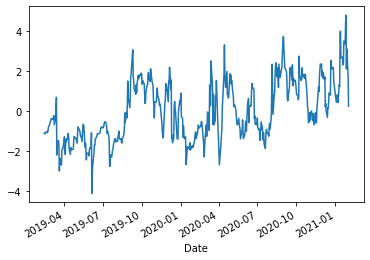

In [166]:
### Dip buying stategy##
def dip_buying_strategy(data, window=20, threshold=0.03):
    # Calculate the rolling average and standard deviation of the stock price
    avg = data['Close'].rolling(window).mean()
    std = data['Close'].rolling(window).std()

    # Calculate the upper and lower bounds for the "dip"
    upper_bound = avg + std * threshold
    lower_bound = avg - std * threshold
    
    # Create a new column to indicate whether to buy or not
    data['Signal'] = np.where(data['Close'] < lower_bound, 1, 0)
    
    return data

In [167]:
dip_buying_strategy (data,20,0.03)

,Open,High,Low,Close,Adj Close,Volume,Signal
Date,,,,,,,
2018-12-31,3.082500,3.167500,3.0775,3.155000,3.051468,11161200,0
2019-01-02,3.112500,3.295000,3.1050,3.267500,3.160276,8496800,0
2019-01-03,3.245000,3.315000,3.1725,3.242500,3.136097,7001600,0
2019-01-04,3.507500,3.822500,3.4250,3.810000,3.684974,47662800,0
2019-01-07,3.777500,3.952500,3.7350,3.870000,3.743005,18872000,0
...,...,...,...,...,...,...,...
2021-01-27,88.707497,95.000000,62.2500,86.877502,86.877502,373586800,0
2021-01-28,66.250000,120.750000,28.0625,48.400002,48.400002,235263200,0
2021-01-29,94.927498,103.495003,62.5000,81.250000,81.250000,202264400,0


In [168]:
min_pct_change = (data.Close.pct_change().rolling (window=30).min())
min_pct_change.plot()

In [170]:
####Momentus trading strategy###

import pandas as pd
import numpy as np

def momentum_trading_algorithm(data, window=14):
    # Calculate the momentum indicator
    momentum = data["Close"].diff(window)

    # Generate the trading signal
    signal = np.where(momentum > 0, 1, 0)

    # Create a DataFrame to store the results
    signal_df = pd.DataFrame(data=signal, columns=["Signal"], index=data.index)

    return signal_df

# Example usage
 
signal = momentum_trading_algorithm(data)
print(signal)

            Signal
Date              
2018-12-31       0
2019-01-02       0
2019-01-03       0
2019-01-04       0
2019-01-07       0
...            ...
2021-01-27       1
2021-01-28       1
2021-01-29       1
2021-02-01       1
2021-02-02       1

[527 rows x 1 columns]


In [172]:
#regmine shift logic 1
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def regime_shift_trading_strategy(data, window=100, threshold=0.5):
    # Calculate the returns of the stock
    returns = data["Close"].pct_change().dropna()

    # Divide the returns into two regimes using a Random Forest classifier
    X = returns.values.reshape(-1, 1)
    y = (returns > returns.rolling(window).mean()).astype(int).values.ravel()

    clf.fit(X, y)

    regime = clf.predict_proba(X)[:, 11] #[:, 1]
    print (regime)
    
    # Generate the trading signal
    signal = np.where(regime > threshold, 1, -1) 
    print ('sginal', signal)
    # Create a DataFrame to store the results
    signal_df = pd.DataFrame(data=signal, columns=["Signal"], index=data.index)
   # print (signal_df)

    return signal_df

# Example usage
 
signal = regime_shift_trading_strategy(data)
print(signal)

IndexError: index 11 is out of bounds for axis 1 with size 2

In [173]:
#regmine shift logic 2
import pandas as pd
import numpy as np

def regime_shift_strategy(data, window=20):
    # Calculate rolling average and standard deviation
#     roll_mean = data.rolling(window=20).mean()
#     roll_std = data.rolling(window=20).std()
    
    roll_mean = data['Close'].rolling(window).mean()
    roll_std = data['Close'].rolling(window).std()
    
    # Create a threshold by multiplying the standard deviation by a factor
    threshold = roll_mean + 2 * roll_std
 
    # Create a signal to buy (1) or sell (-1) based on the threshold
    signal = np.where(data > threshold, 1, -1)
    print (signal)   
    
    # Create a DataFrame to store the strategy results
    strategy = pd.DataFrame({'price': [data], 'signal': [signal]})
    return strategy

# Example usage
 
signal = regime_shift_strategy(data)
print(signal)

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
                                               price  \
0                   Open        High      Low    ...   

                                              signal  
0  [[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...  
                                               price  \
0                   Open        High      Low    ...   

                                              signal  
0  [[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...  


In [ ]:
#regmine shift logic 3
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the stock price data into a pandas DataFrame
df = data
 
# Calculate some basic technical indicators as features
df["return"] = df["Close"].pct_change()
df["moving_avg"] = df["Close"].rolling(window=20).mean()
df["moving_std"] = df["Close"].rolling(window=20).std()
df["bollinger_upper"] = df["moving_avg"] + 2*df["moving_std"]
df["bollinger_lower"] = df["moving_avg"] - 2*df["moving_std"]
df["momentum"] = df["Close"] - df["Close"].shift(10)

# Create the target variable based on the regime shift (e.g., bullish or bearish market)
df["regime"] = np.where(df["return"] > 0, 1, 0)
 
df = df.dropna()
# Split the data into training and testing sets
features = ["moving_avg", "bollinger_upper", "bollinger_lower", "momentum"]
target = "regime"
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
 
# extra start###############
# Separate the features and target
X = df.drop('regime', axis=1).dropna()
y = df['regime']
print ('y is', y)

# Replace negative values with 0.01
X[X < 0] = 0.01

# Train a RandomForestClassifier model on the input data
model = RandomForestClassifier()
model.fit(X, y)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2

# Select the best k features using chi2
selector = SelectKBest(chi2, k=5)
X = selector.fit_transform(X, y)

# Train an ExtraTreesClassifier model on the selected features
model = ExtraTreesClassifier()
model.fit(X, y)

# extra end###############
# Train the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc*100))


# Plot the decision boundary
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)

# Plot the training and testing data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolor='k', alpha=0.6)

# Show the plot
plt.show()

#################################
# Plot the decision boundary
# Generate a sample dataset
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# X, y = make_classification(n_features=4, random_state=0)
# print (X)

# # Generate a grid of points for plotting the decision boundary
# xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

# # Predict the class labels for the grid of points
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# # Plot the training and testing data
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolor='k', alpha=0.6)

# # Show the plot
# plt.show()

# Generate data with 100 features, 80 informative features, 10 redundant features, and 5 repeated features
# X, y = make_classification(n_features=100, n_informative=80, n_redundant=10, n_repeated=5, random_state=0)


##########extra start
# # Add 2 additional features to X to meet the requirement of the model
# X = np.hstack((X, np.zeros((100, 2))))
# print (X)
 
##########extra end

            # xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.1),
            #                      np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.1))

            # Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
            # plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)

            # # Plot the training and testing data
            # plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')
            # plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, edgecolor='k', alpha=0.6)

            # # Show the plot
            # plt.show()

#################################

# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# import numpy as np
 

# # Plot the training data
# plt.scatter(X_train , y_train, color='blue', marker='o', label='Training Data')

# # Plot the testing data
# # plt.scatter(X_test[:, 0], y_test, color='red', marker='x', label='Testing Data')
# plt.scatter(X_test["moving_avg"], y_test, color='red', marker='x', label='Testing Data')

# # Add a legend
# plt.legend(loc='best')

# # Show the plot
# plt.show()
